<h1>Student Performance Prediction: Regression with Random Forest and Simple Linear Regression</h1>

<h2>Imports and dataset</h2>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorboard.notebook import display

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0


<h2>Preprocessing</h2>

In [3]:
# Fill missing values
df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0])
df['Performance Index'] = df['Performance Index'].fillna(df['Performance Index'].mean())
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].fillna(df['Sample Question Papers Practiced'].mean())
df['Previous Scores'] = df['Previous Scores'].fillna(df['Previous Scores'].mean())
df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].mean())

# Binary encoding for 'Extracurricular Activities'
df['Binary_Extracurricular_Active'] = df['Extracurricular Activities'].apply(lambda val: 1 if val == "Yes" else 0)

# Drop unnecessary columns
X = df.drop(columns=['Extracurricular Activities', 'Performance Index'])
y = df['Performance Index']

In [4]:
# Scale numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<h2>Train the models</h2>

In [31]:
from LinearRegression import LinearRegression
rf_model = RandomForestRegressor(
    random_state=42,
    max_depth=4, 
    max_features='sqrt',  
    min_samples_split=27,  
    min_samples_leaf=5  )
rf_model.fit(X_train, y_train)

slr_model = LinearRegression()
slr_model.fit(X_train, y_train)


In [33]:
rf_y_pred = rf_model.predict(X_test)
slr_y_pred = slr_model.predict(X_test)

<h2>Actual vs. Predicted Results </h2>

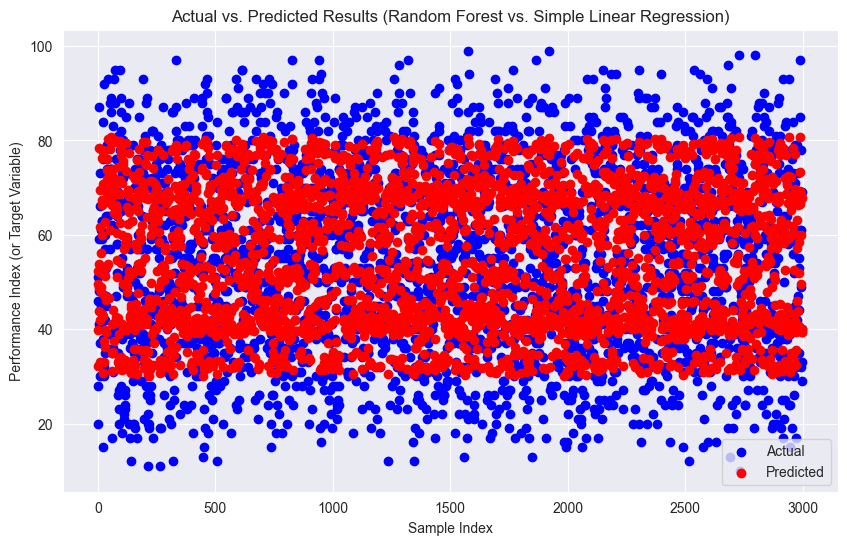

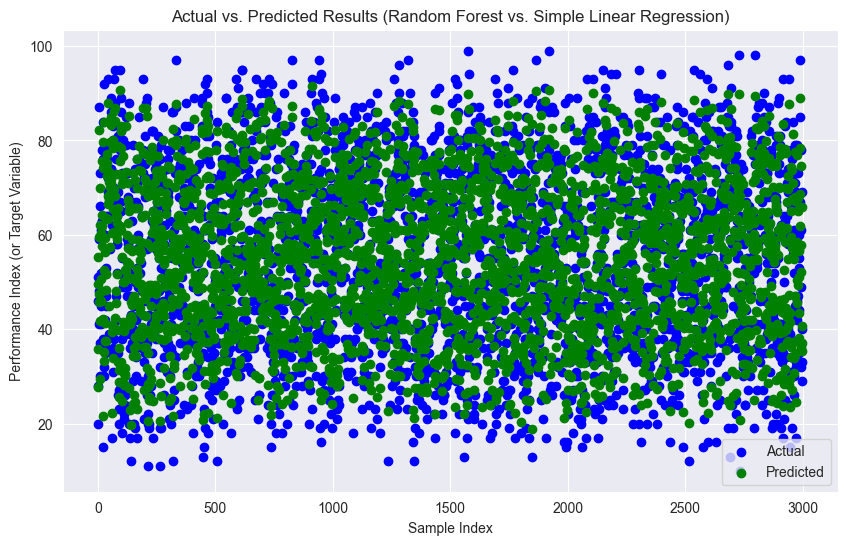

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(rf_y_pred)), y_test, color='blue', label='Actual')
plt.scatter(range(len(rf_y_pred)), rf_y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Results (Random Forest vs. Simple Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index (or Target Variable)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(slr_y_pred)), y_test, color='blue', label='Actual')
plt.scatter(range(len(slr_y_pred)), slr_y_pred, color='green', label='Predicted')
plt.title('Actual vs. Predicted Results (Random Forest vs. Simple Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index (or Target Variable)')
plt.legend()
plt.show()

,Actual,RM_Predicted,SLR_Predicted,RM_Error,SLR_Error
6252,51.0,52.280917,55.222731,1.280917,4.222731
4684,20.0,32.222648,27.823031,12.222648,7.823031
1731,46.0,49.512083,49.635287,3.512083,3.635287
4742,28.0,39.785487,35.722308,11.785487,7.722308
4521,41.0,43.796391,45.747713,2.796391,4.747713
...,...,...,...,...,...
8014,32.0,40.125317,36.190438,8.125317,4.190438
1074,40.0,39.361349,40.691584,-0.638651,0.691584
3063,33.0,39.293676,37.119139,6.293676,4.119139
6487,69.0,67.784462,65.889312,-1.215538,-3.110688


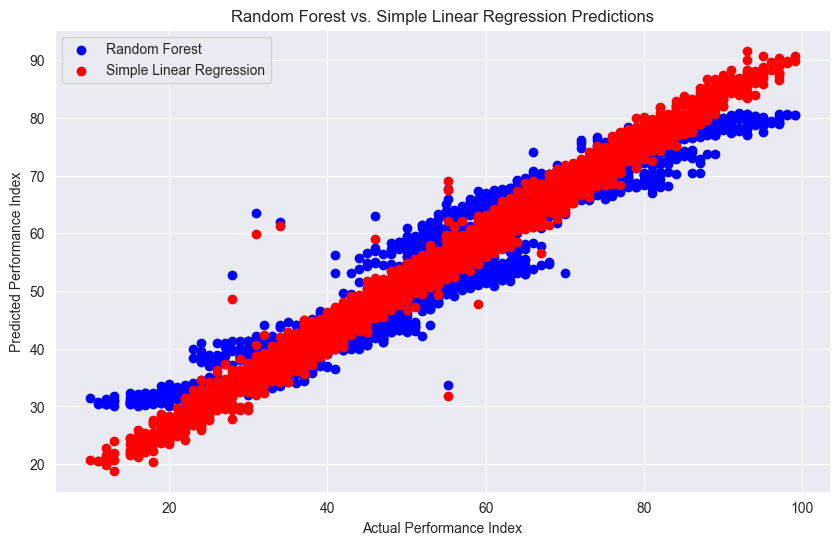

In [45]:
comparison_df = pd.DataFrame({'Actual': y_test, 'RM_Predicted': rf_y_pred, 'SLR_Predicted': slr_y_pred, 'RM_Error': rf_y_pred - y_test, 'SLR_Error': slr_y_pred - y_test})
display(comparison_df)

#visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Random Forest')
plt.scatter(y_test, slr_y_pred, color='red', label='Simple Linear Regression')
plt.title('Random Forest vs. Simple Linear Regression Predictions')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.show()

<h2>Evaluate the model</h2>

In [47]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r_squared = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest R² Score:", rf_r_squared)
print("Random Forest Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_y_pred))
print("Random Forest Root Mean Squared Error (RMSE):", rf_rmse)
print('ـــــــــــــــــــــــــــــــــــــــــــــــــــ')
slr_mse = mean_squared_error(y_test, slr_y_pred)
slr_r_squared = r2_score(y_test, slr_y_pred)
slr_rmse = np.sqrt(slr_mse)
print("Simple Linear Regression R² Score:", slr_r_squared)
print("Simple Linear Regression Mean Absolute Error (MAE):", mean_absolute_error(y_test, slr_y_pred))
print("Simple Linear Regression Root Mean Squared Error (RMSE):", slr_rmse)

Random Forest R² Score: 0.8898378562515855
Random Forest Mean Absolute Error (MAE): 5.01948561132273
Random Forest Root Mean Squared Error (RMSE): 6.38030127165372
ـــــــــــــــــــــــــــــــــــــــــــــــــــ
Simple Linear Regression R² Score: 0.9581787026005257
Simple Linear Regression Mean Absolute Error (MAE): 3.157205499032206
Simple Linear Regression Root Mean Squared Error (RMSE): 3.9311874041253914


# Recommend a model based on the evaluation metrics


In [48]:
if rf_rmse < slr_rmse:
    print("Random Forest Regression is recommended.")
else:
    print("Simple Linear Regression is recommended.")

Simple Linear Regression is recommended.
